In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [2]:
df = pd.read_excel('/content/Superstore Dataset.xlsx')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [5]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [3]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [4]:
df.dtypes['Postal Code']

dtype('O')

In [5]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

np.int64(0)

##2. Statistical Summary

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,623.245101,2.225110,0.206452,234.260108


The dataset includes 9,994 orders recorded between 2014 and 2017. The average sales per order is about $229.86, but half of the orders are below $54.49, showing that most sales are small, with a few very large orders reaching up to $22,638. Customers usually buy between 2 to 5 items, while the largest order had 14 items. Discounts range widely from 0% to 80%, with half of the orders receiving a discount of 20% or less.

There is a big difference in profit values, where some orders caused losses up to $6,599, while the highest profit from a single order was $8,399. On average, each order earned about $28.66 profit, but many orders had very low or negative profits. This suggests that high discounts and certain sales patterns may impact profitability.

In [ ]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,631,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,263,3203,19,6026,1523,48


The dataset covers 9,994 orders, all from the United States. There are 3 customer segments, with the Consumer segment being the most common, making up more than half of the orders (5,191 times). The most frequently used shipping method is Standard Class, used in about 60% of the orders (5,968 times).

There are 793 unique customers and a wide variety of products, with 1,850 different product names across 17 sub-categories. The most frequently ordered product is the Staple envelope, ordered 48 times. Most orders came from New York City and the state of California, while the West region recorded the highest number of orders (3,203 times). This shows that the business mainly serves a diverse customer base within the U.S., focusing on office supplies and common shipping methods.

##3. Non-Graphical Analysis

In [ ]:
cat_columns = df.select_dtypes(include='object').columns

for col in cat_columns:
    print(f"\nValue Counts for {col}:\n")
    print(df[col].value_counts())



Value Counts for Order ID:

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-110422     1
CA-2016-125794     1
CA-2017-163566     1
US-2015-151435     1
CA-2016-130225     1
Name: count, Length: 5009, dtype: int64

Value Counts for Ship Mode:

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Value Counts for Customer ID:

Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
            ..
AO-10810     1
LD-16855     1
JR-15700     1
CJ-11875     1
RE-19405     1
Name: count, Length: 793, dtype: int64

Value Counts for Customer Name:

Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Lela Donovan            1
Jocasta Rupert          1
Car

In [ ]:
df[cat_columns].nunique()

,0
Order ID,5009
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4


The dataset shows that the most frequently used shipping method is Standard Class, applied in 5,968 orders, followed by Second Class and First Class. Among customer segments, the Consumer segment dominates with 5,191 orders, while Corporate and Home Office have fewer orders. All transactions are within the United States, covering 49 states and 531 cities, with New York City being the most common city for orders.

There are 793 unique customers and a wide range of products, including 1,850 different product names across 17 sub-categories. The most popular sub-category is Binders, followed by Paper and Furnishings. The West region recorded the highest number of orders (3,203 orders), while the South had the least. The most frequently ordered product is the Staple envelope, purchased 48 times, indicating a focus on office supply items.

##4. Graphical Analysis

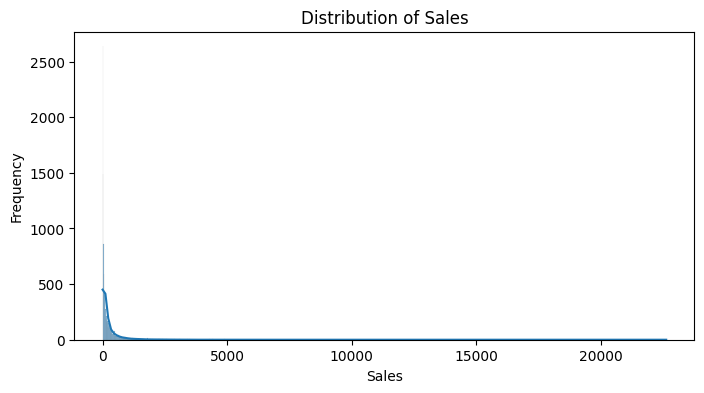

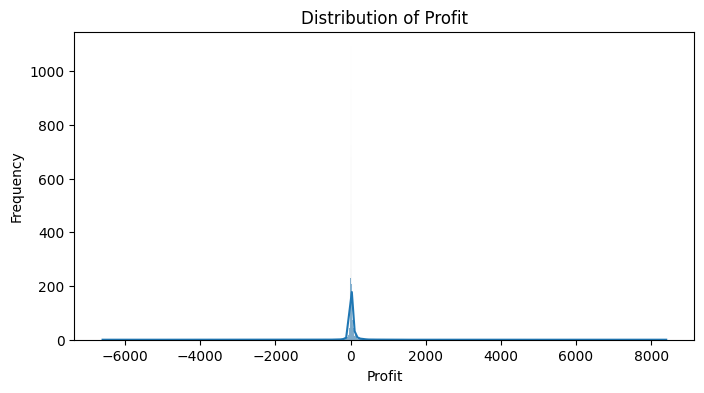

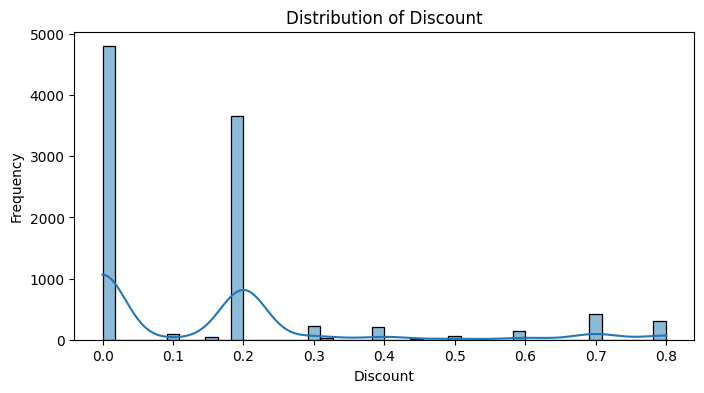

In [ ]:
num_cols = ['Sales', 'Profit', 'Discount']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Distribution of Sales:
The sales distribution is heavily skewed to the right, meaning most orders have low sales amounts. A large number of sales are below $500, while only a few orders reach very high sales values above $5,000. This shows that high-value sales are rare, and most transactions are small.

Distribution of Profit:
The profit distribution is centered around zero, showing that many orders make only a small profit or even a loss. There are noticeable negative profits, indicating that several transactions resulted in losses. A few orders achieved high profits, but they are very uncommon.

Distribution of Discount:
The discount distribution shows that most orders either had no discount or a fixed discount of around 20%. There are also smaller peaks at higher discount levels, such as 30%, 40%, and 70%, meaning discounts were applied in set patterns rather than random values.

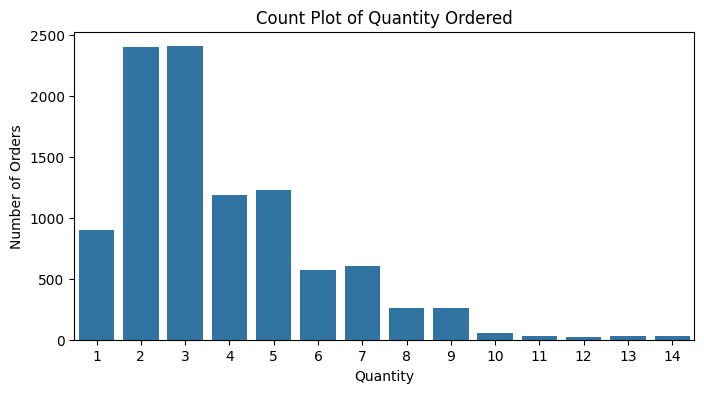

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Quantity', data=df)
plt.title('Count Plot of Quantity Ordered')
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.show()

The count plot shows that most customers ordered small quantities. The highest number of orders were for 2 or 3 items, followed by single-item orders. As the quantity increases beyond 5 items, the number of orders drops sharply. Very few customers placed large orders of 10 or more items, indicating that bulk purchases are rare in this dataset.

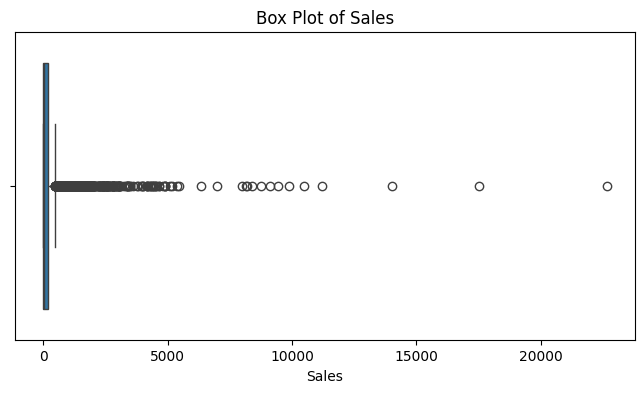

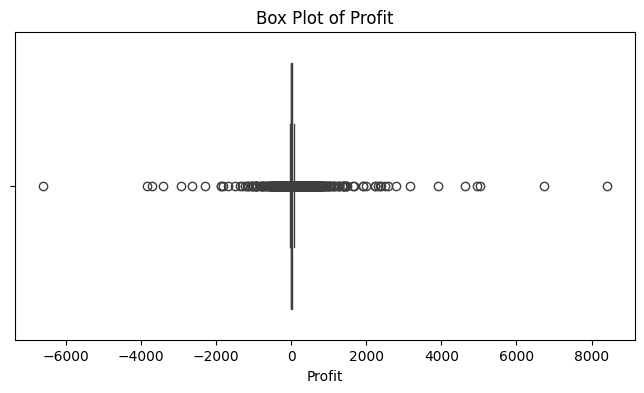

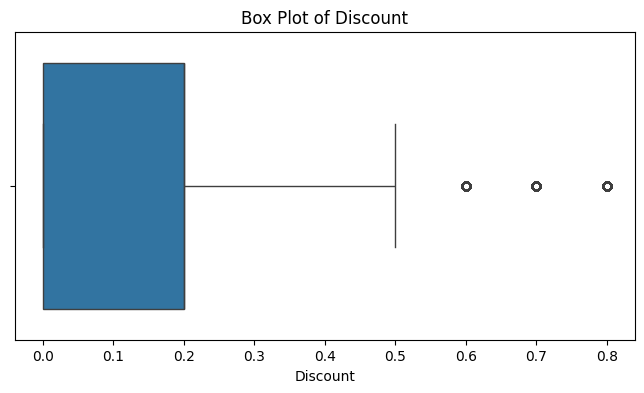

In [ ]:
num_cols = ['Sales', 'Profit', 'Discount']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Box Plot of Sales: The sales box plot shows that most sales amounts are low, while there are many outliers with very high sales. This means a few expensive orders stand out from the usual smaller transactions.

Box Plot of Profit: The profit box plot reveals a wide spread of values, with several negative and positive outliers. This indicates that while most profits are small, some orders caused big losses or high profits.

Box Plot of Discount: The discount box plot shows that most discounts are between 0% and 20%, but there are clear outliers at higher discount levels like 60% to 80%, meaning special high discounts were given in some cases.



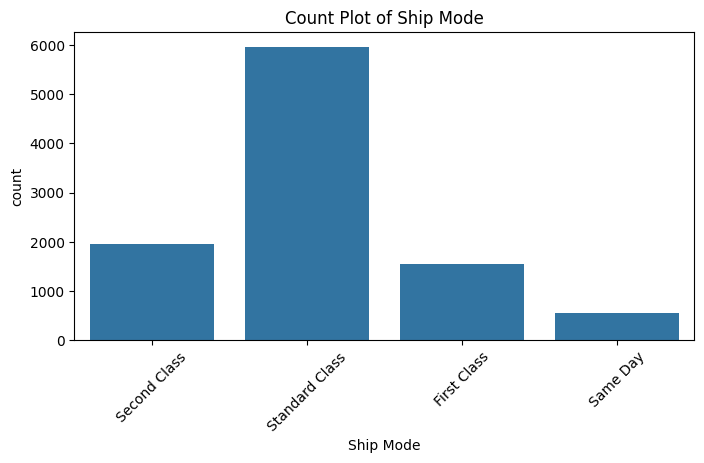

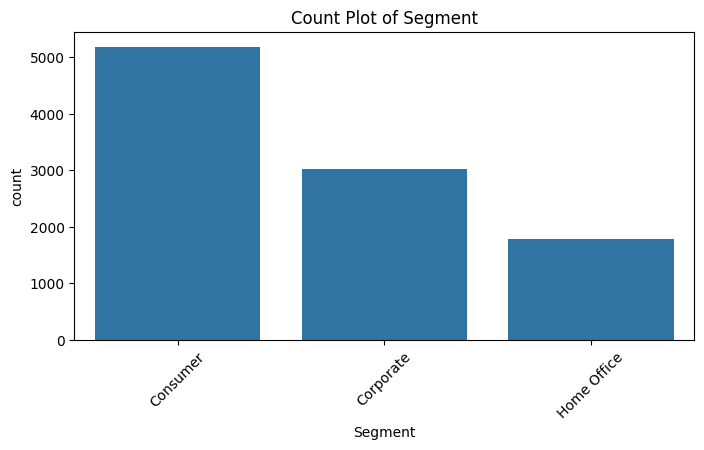

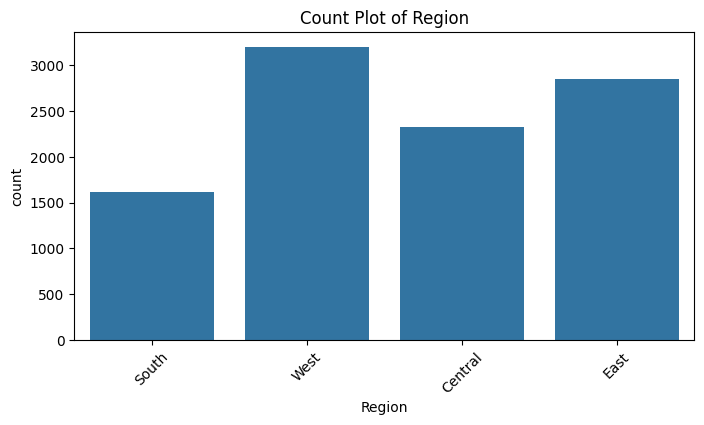

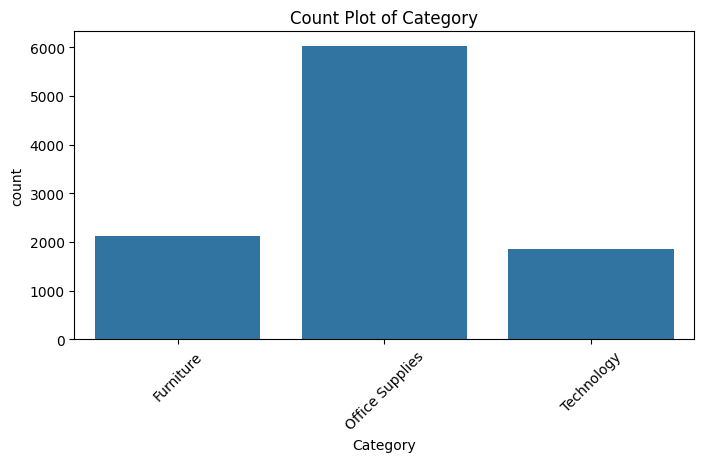

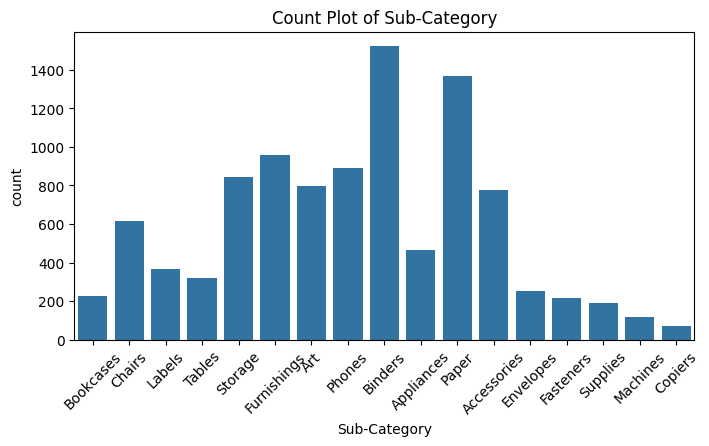

In [ ]:
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

The count plots show that most orders used Standard Class shipping, while Same Day shipping was the least used option. The Consumer segment made the highest number of purchases compared to Corporate and Home Office customers. Among regions, the West had the most orders, followed by the East and Central regions, while the South had the fewest.

In terms of product categories, Office Supplies were the most frequently ordered items, while Technology and Furniture had fewer orders. For sub-categories, Binders and Paper were the top-selling items, while products like Copiers and Machines were ordered the least. This indicates that customers mostly buy everyday office items with standard shipping.

##Bivariate Analysis:

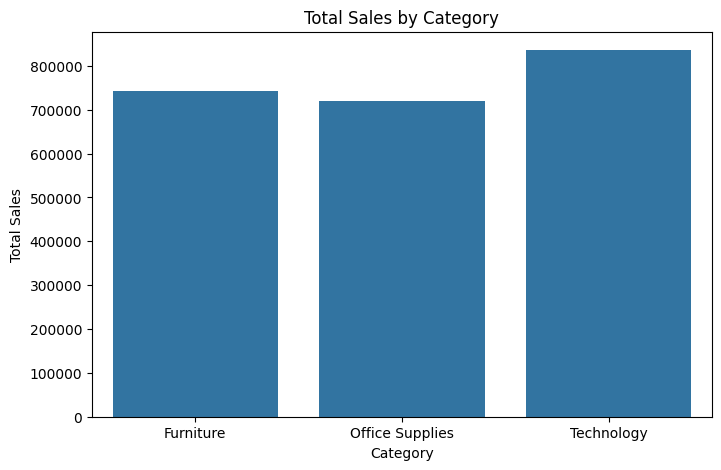

In [ ]:
plt.figure(figsize=(8,5))
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()

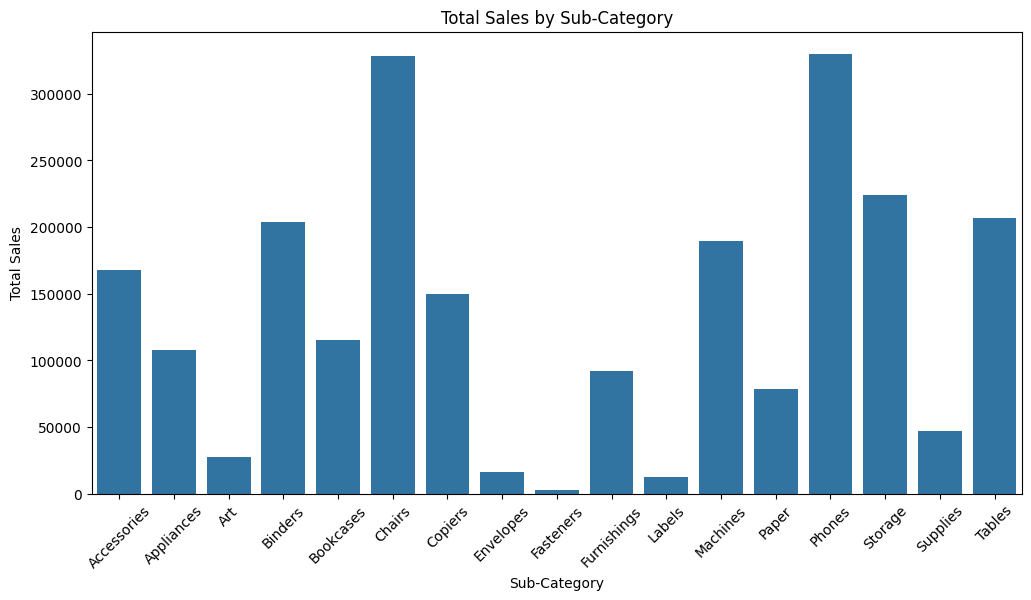

In [ ]:
plt.figure(figsize=(12,6))
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

sns.barplot(x='Sub-Category', y='Sales', data=subcat_sales)
plt.title('Total Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

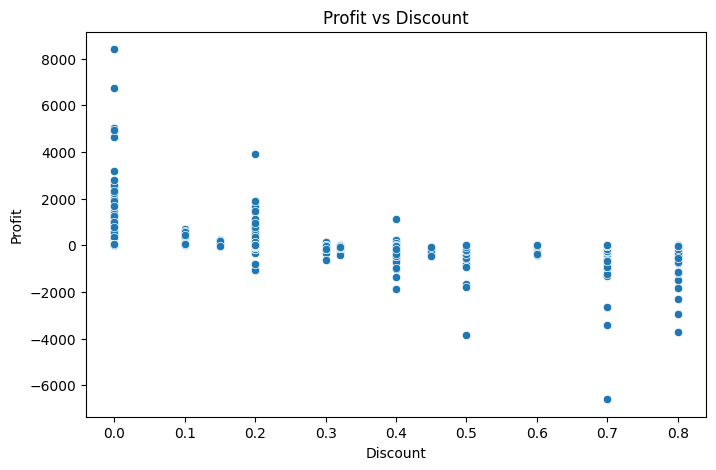

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

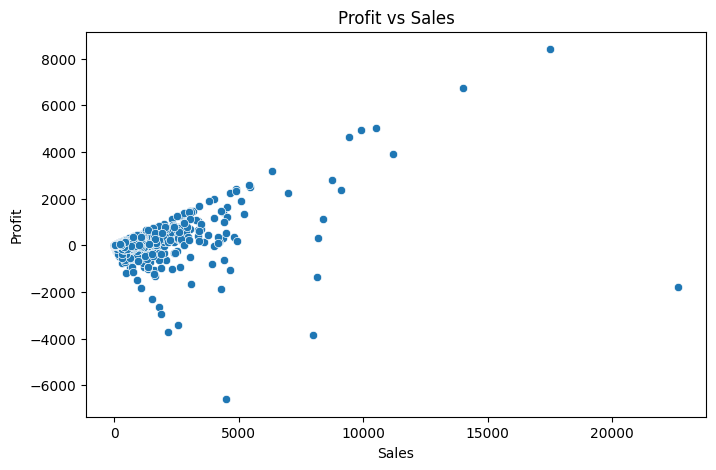

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Profit vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


The scatter plot shows that higher sales do not always lead to higher profits. There are several points where large sales still result in losses (negative profit). This means that even when sales amounts are high, factors like heavy discounts or high costs can cause the company to lose money on those orders.

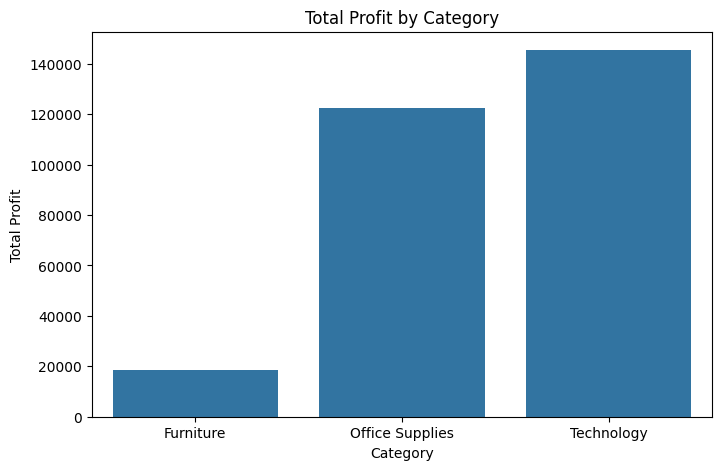

In [ ]:
plt.figure(figsize=(8,5))
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by Category')
plt.ylabel('Total Profit')
plt.show()

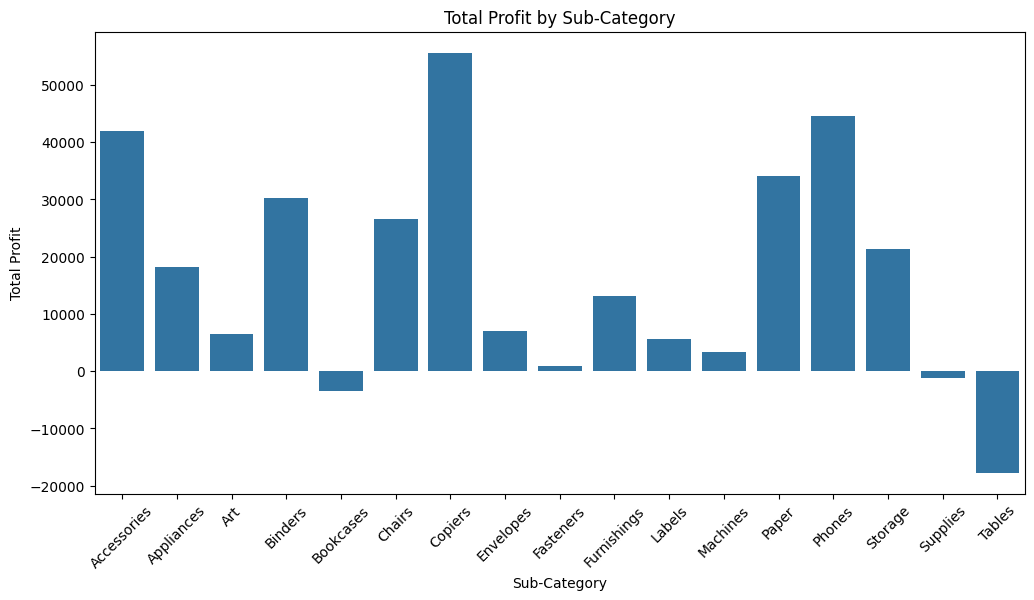

In [ ]:
plt.figure(figsize=(12,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
sns.barplot(x='Sub-Category', y='Profit', data=subcat_profit)
plt.title('Total Profit by Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

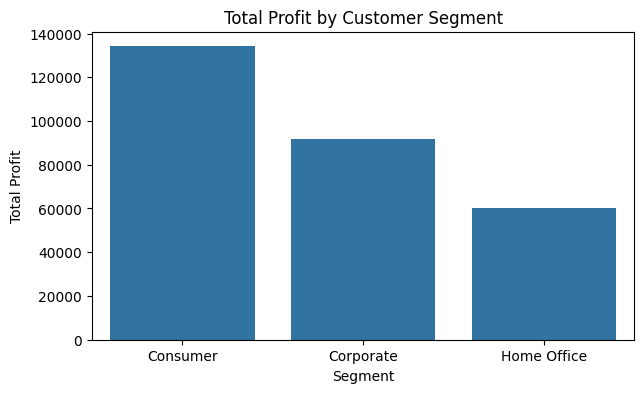

In [ ]:
plt.figure(figsize=(7,4))
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()
sns.barplot(x='Segment', y='Profit', data=segment_profit)
plt.title('Total Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.show()

The bar plot shows that the Consumer segment contributes the most to profit, followed by the Corporate segment. The Home Office segment brings in the least profit.

This means individual consumers are the most profitable customers for the business, while sales to home offices generate lower profits.

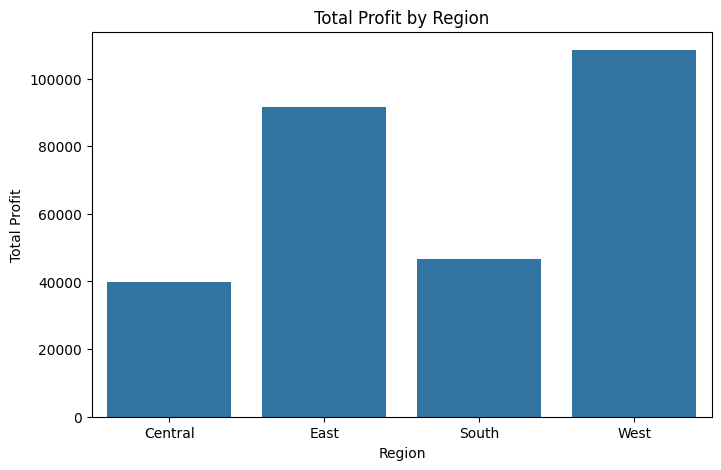

In [ ]:
plt.figure(figsize=(8,5))
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
sns.barplot(x='Region', y='Profit', data=region_profit)
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.show()

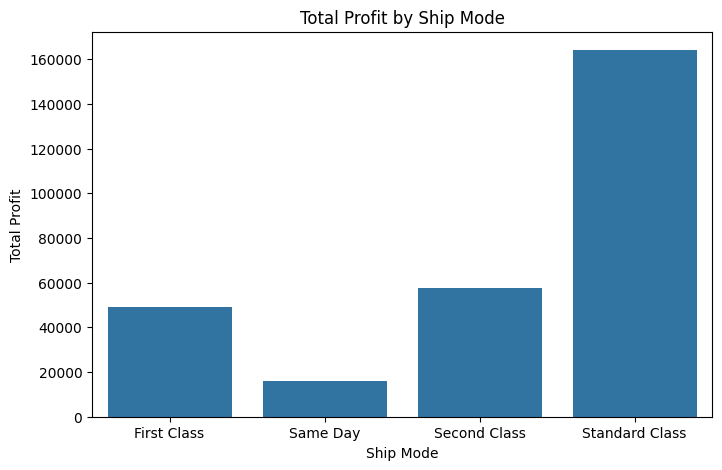

In [ ]:
plt.figure(figsize=(8,5))
shipmode_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index()
sns.barplot(x='Ship Mode', y='Profit', data=shipmode_profit)
plt.title('Total Profit by Ship Mode')
plt.ylabel('Total Profit')
plt.show()

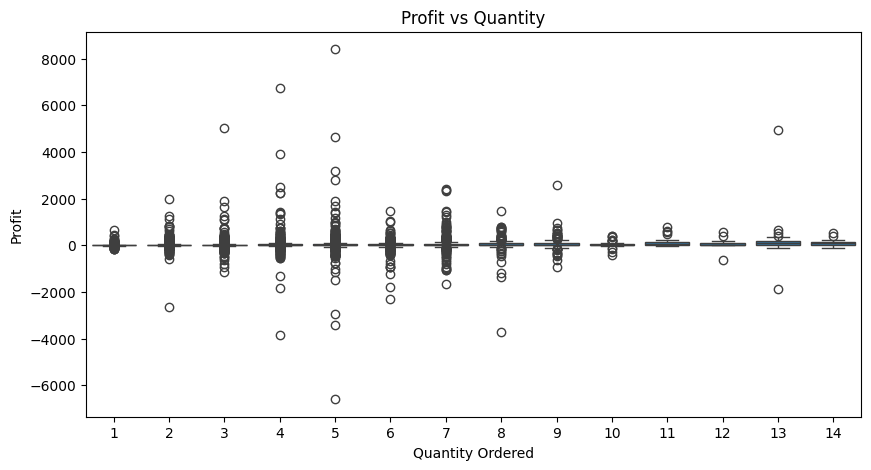

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Quantity', y='Profit', data=df)
plt.title('Profit vs Quantity')
plt.ylabel('Profit')
plt.xlabel('Quantity Ordered')
plt.show()

Bulk orders do not always lead to more profit.
In many cases, larger orders result in losses, likely because of high discounts given on big purchases.
So, offering big discounts on large orders might be hurting profitability!



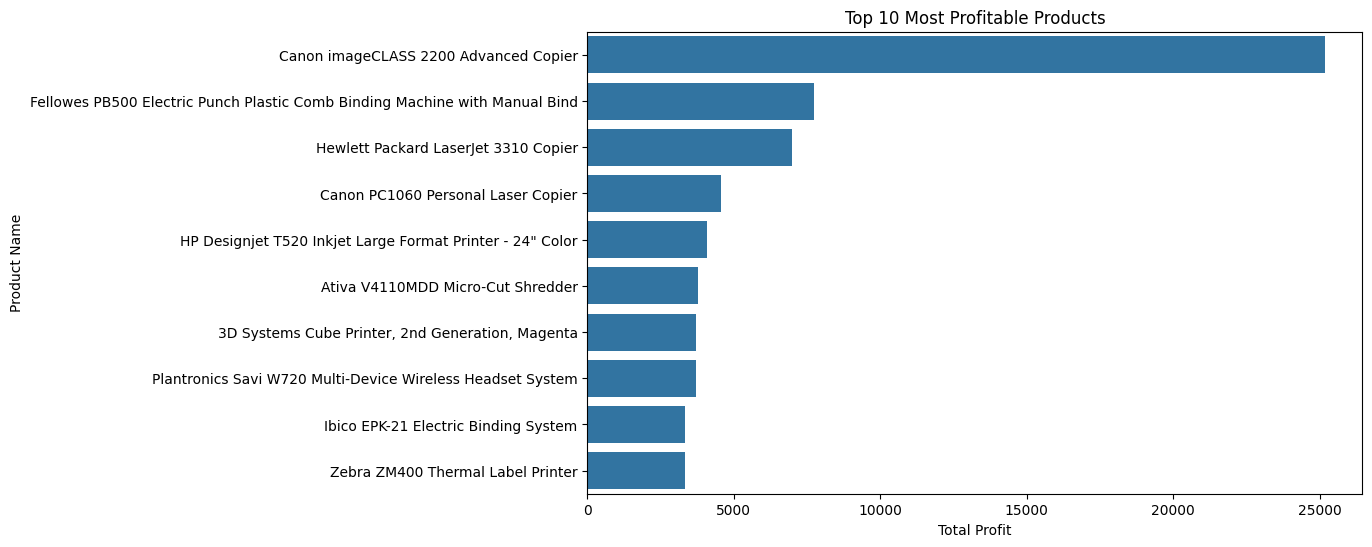

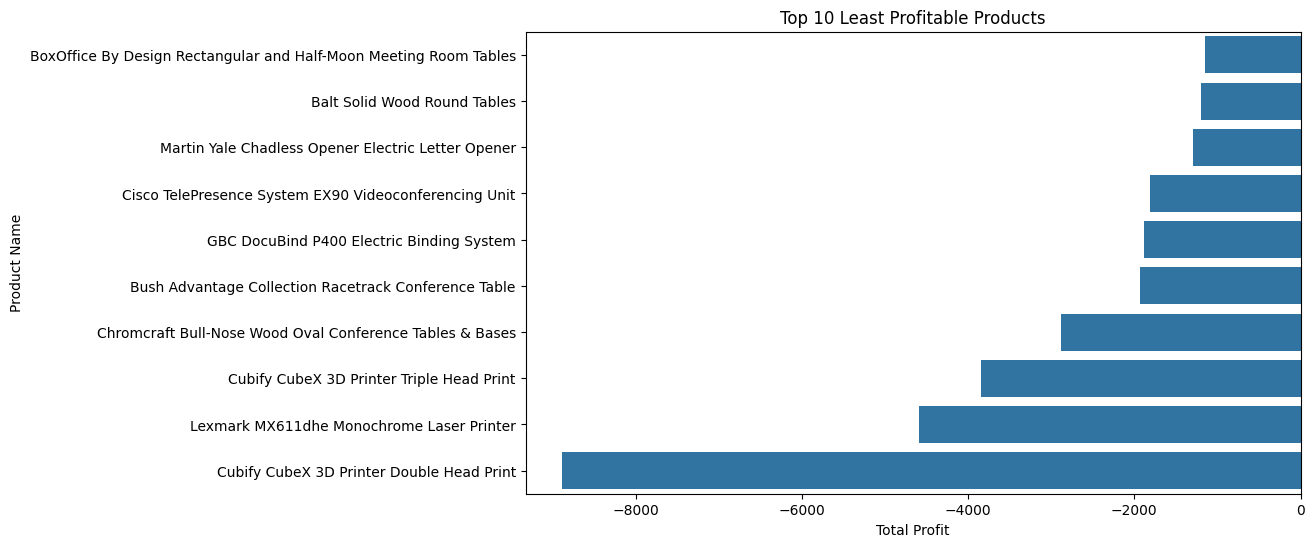

In [ ]:
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

top_10_profitable = product_profit.head(10)

bottom_10_profitable = product_profit.tail(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_profitable.values, y=top_10_profitable.index)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_10_profitable.values, y=bottom_10_profitable.index)
plt.title('Top 10 Least Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()


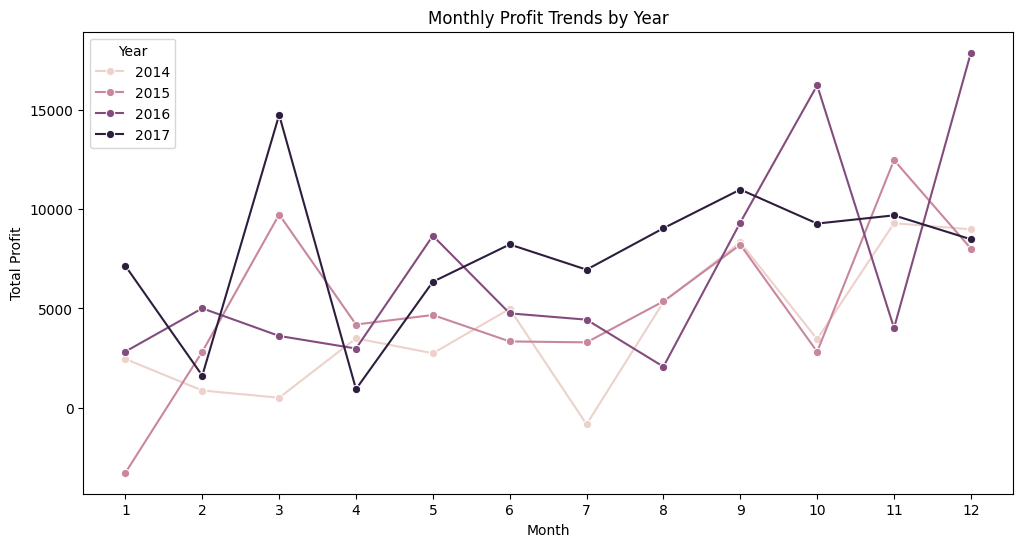

In [ ]:

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_profit, marker='o')
plt.title('Monthly Profit Trends by Year')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(range(1,13))
plt.show()


The graph shows that profit changes throughout the year and across different years. Profits generally increase in the last months of each year, especially in November and December, likely due to holiday sales. However, some months like January and July show drops or even negative profits in certain years. This means profitability is seasonal, with strong performance at year-end but unstable or low profits in other months.


##Multivariate Analysis



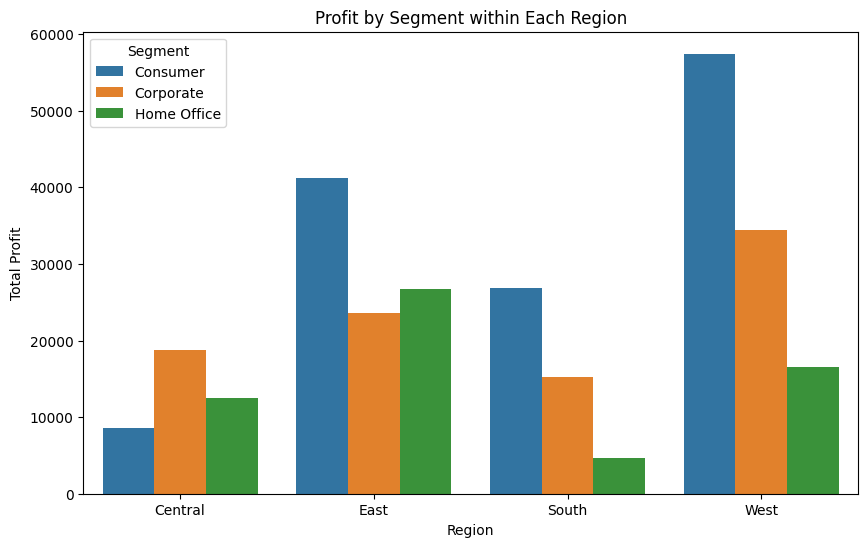

In [9]:
seg_region_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', hue='Segment', data=seg_region_profit)
plt.title('Profit by Segment within Each Region')
plt.ylabel('Total Profit')

plt.show()


The analysis shows that the Consumer segment brings in the highest profit across all regions, especially in the West, which is the top-performing region. The Corporate segment earns moderate profits, while the Home Office segment usually has the lowest profits. In particular, the South region and Home Office segment show the weakest profitability.

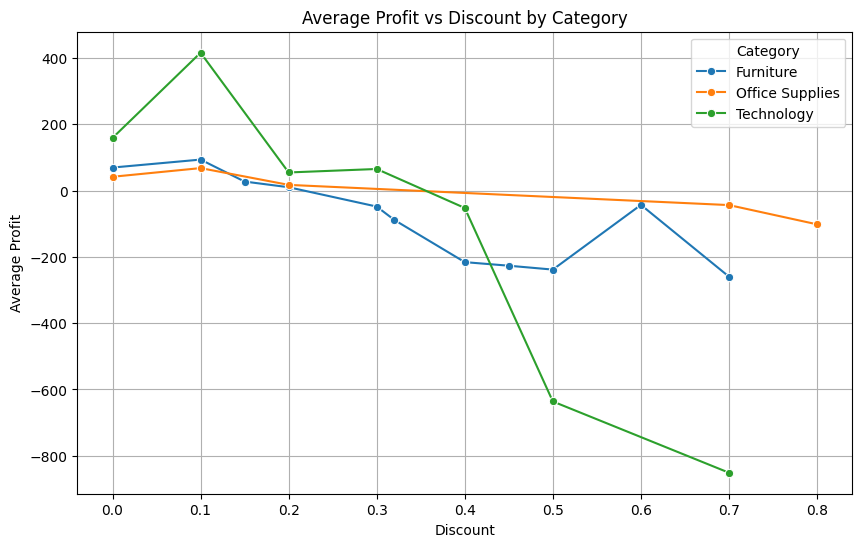

In [10]:
cat_disc_profit = df.groupby(['Category', 'Discount'])['Profit'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', hue='Category', data=cat_disc_profit, marker="o")
plt.title('Average Profit vs Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Average Profit')

plt.grid(True)
plt.show()


Technology starts with high profit but loses profit rapidly at higher discounts.Furniture shows moderate profit but also drops as discounts increase.
Office Supplies maintains small profits at low discounts but dips below zero with higher discounts.

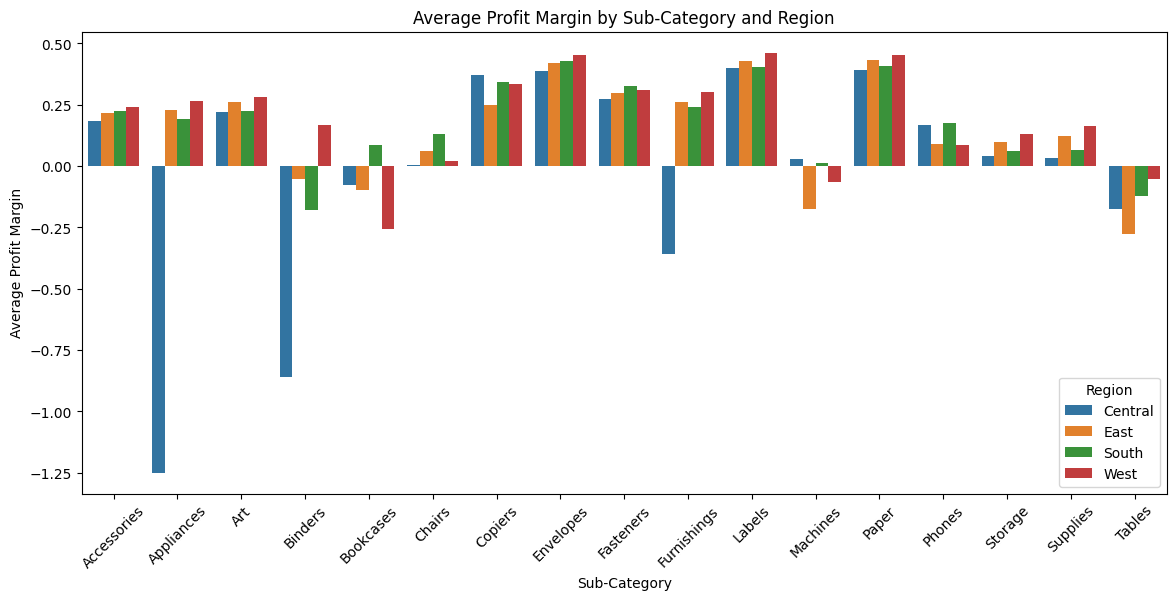

In [13]:
df['Profit Margin'] = df['Profit'] / df['Sales']
subcat_region_margin = df.groupby(['Sub-Category', 'Region'])['Profit Margin'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Sub-Category', y='Profit Margin', hue='Region', data=subcat_region_margin)
plt.title('Average Profit Margin by Sub-Category and Region')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.show()


Most sub-categories across regions are profitable (positive profit margin). However, Appliances and Art in the Central region have significant negative profit margins (large losses). On the other hand, sub-categories like Copiers, Envelopes, and Paper show high profit margins consistently across all regions, especially in the West and East. These are the strongest performing sub-categories.

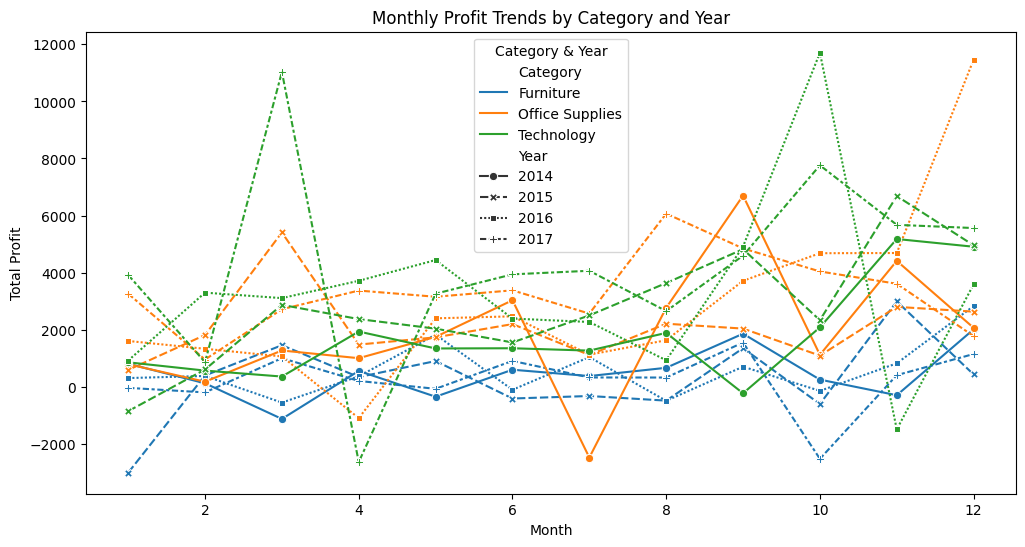

In [14]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year


time_category_profit = df.groupby(['Year', 'Month', 'Category'])['Profit'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=time_category_profit, x='Month', y='Profit', hue='Category', style='Year', markers=True)
plt.title('Monthly Profit Trends by Category and Year')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.legend(title='Category & Year')
plt.show()


The plot shows how profits for different categories (Furniture, Office Supplies, Technology) change across months and years. Technology and Office Supplies generally earned higher profits, while Furniture had lower and sometimes negative profits. There are clear seasonal trends: for example, many profit spikes appear in the last quarter (October to December), especially for Office Supplies and Technology. However, profit levels vary each year, showing that both the time of year and yearly market changes impact category performance.

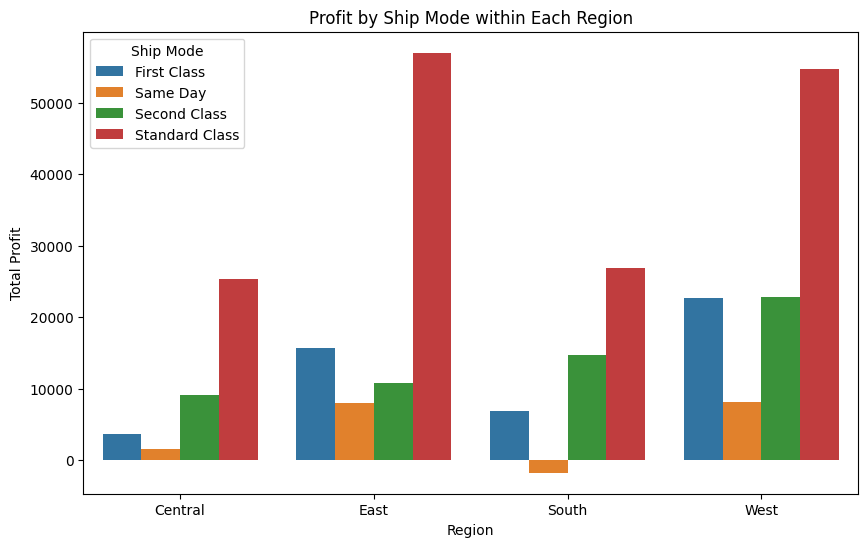

In [15]:
region_ship_profit = df.groupby(['Region', 'Ship Mode'])['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', hue='Ship Mode', data=region_ship_profit)
plt.title('Profit by Ship Mode within Each Region')
plt.ylabel('Total Profit')
plt.show()


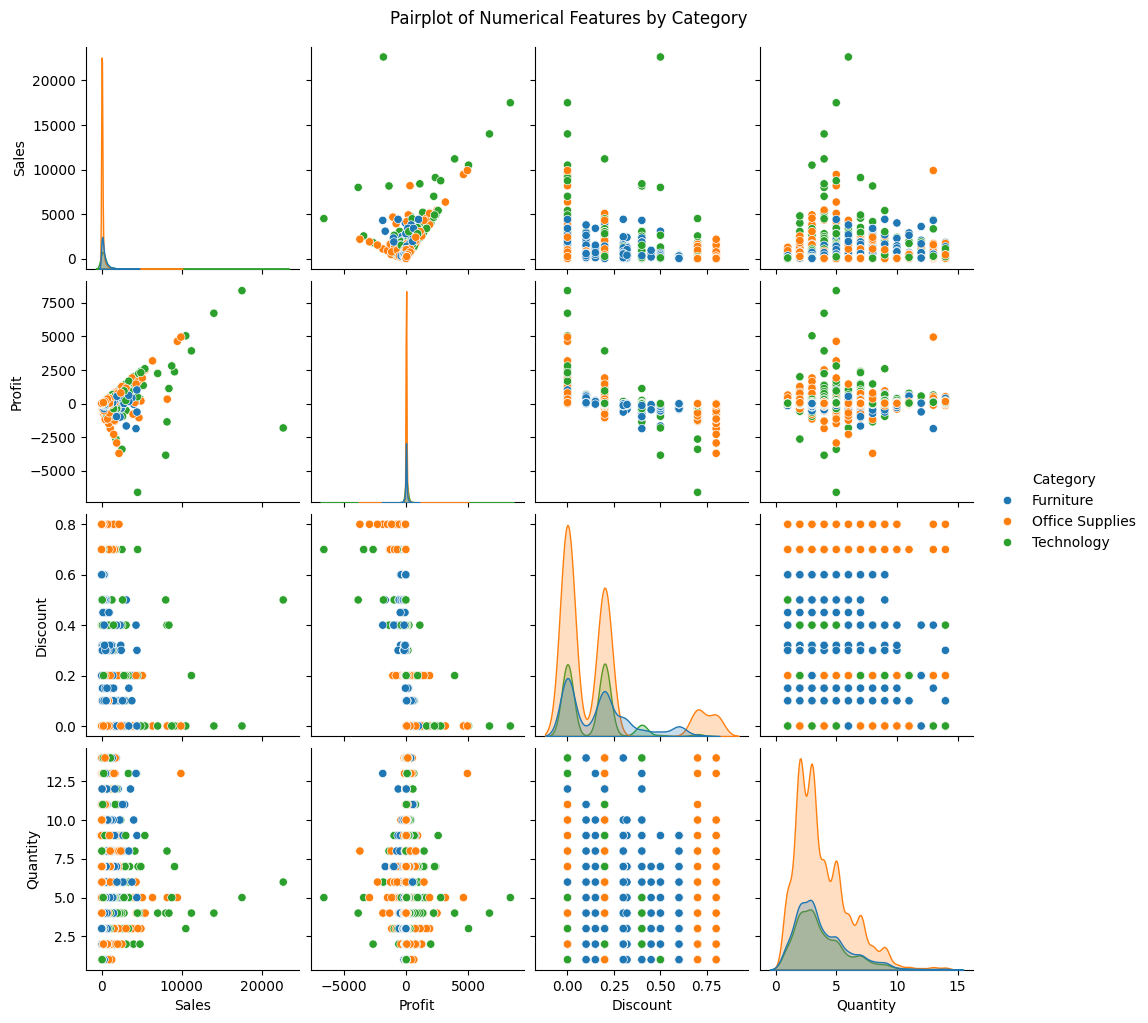

In [17]:
pairplot_data = df[['Sales', 'Profit', 'Discount', 'Quantity', 'Category']]

sns.pairplot(pairplot_data, hue='Category')
plt.suptitle('Pairplot of Numerical Features by Category', y=1.02)
plt.show()

The pairplot shows the relationships between Sales, Profit, Discount, and Quantity across different product categories. It highlights some clear patterns: higher sales usually relate to higher profits, especially in the Technology category, but there are also outliers where large sales did not bring high profit. Discount has a negative impact on profit; higher discounts tend to lower profitability, which is most visible in the scatterplots. Quantity does not show a strong direct relationship with profit or sales but does cluster at lower values (most orders are for smaller quantities). Additionally, some outliers and patterns differ by category, especially Technology showing stronger profit at higher sales levels, while Furniture and Office Supplies show more variability.

##Correlation Analysis

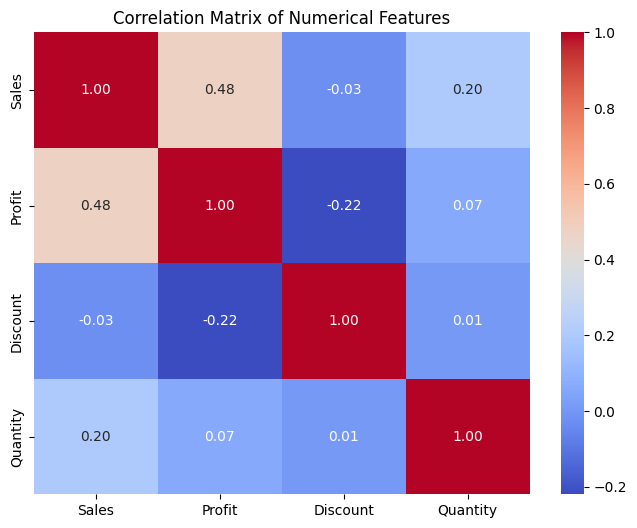

In [6]:

corr = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numerical Features')
plt.show()


Sales and Profit have a moderate positive correlation (0.48). This means when sales increase, profit tends to increase too but the relationship is not very strong because factors like high discounts or costs can still reduce profit.

Discount and Profit show a negative correlation (-0.22). This tells us that increasing discounts generally reduce profit. More discount means less profit.

Quantity has weak correlations with all other variables (all close to 0). This means the number of units sold does not strongly relate to sales profit or discount levels.

Sales and Discount have almost no correlation (-0.03) suggesting that discounts do not consistently lead to higher or lower sales in this dataset.

##Outlier Detection

Sales - Number of outliers: 1167


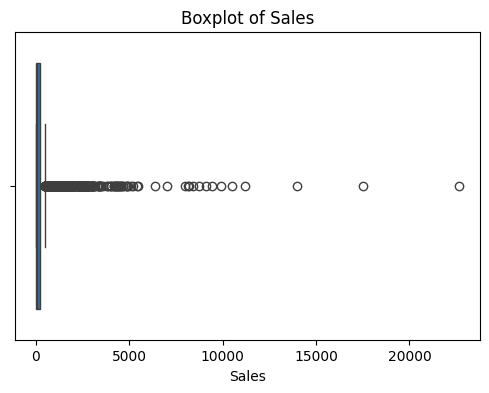

Profit - Number of outliers: 1881


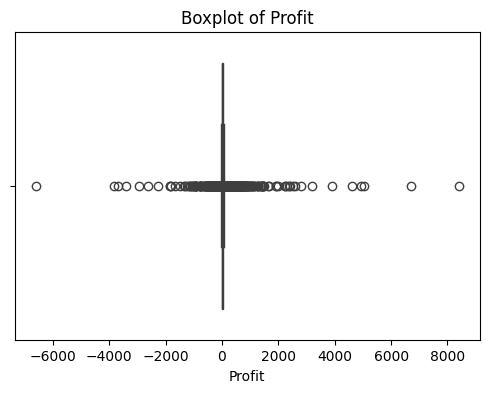

Discount - Number of outliers: 856


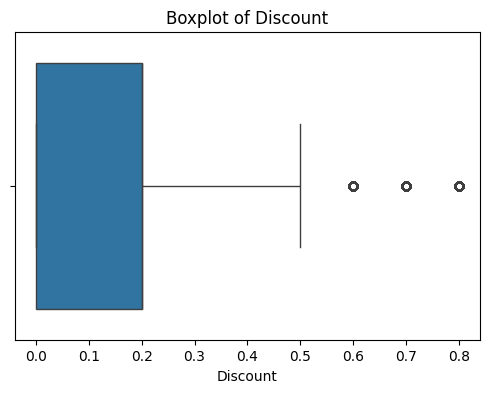

Quantity - Number of outliers: 170


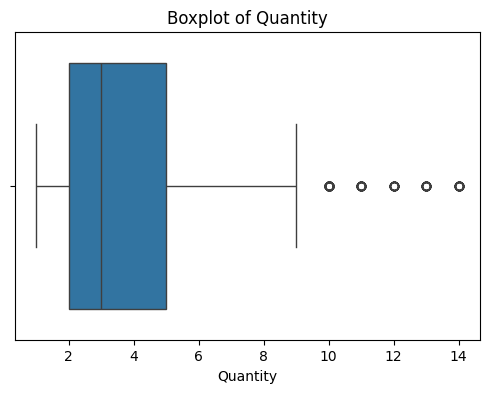

In [7]:
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} - Number of outliers: {outliers.shape[0]}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


##Conditional Analysis

What percentage of orders come from each segment and region?

In [8]:
segment_counts = df['Segment'].value_counts(normalize=True) * 100
print("Percentage of Orders by Segment:")
print(segment_counts)


region_counts = df['Region'].value_counts(normalize=True) * 100
print("\nPercentage of Orders by Region:")
print(region_counts)

Percentage of Orders by Segment:
Segment
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: proportion, dtype: float64

Percentage of Orders by Region:
Region
West       32.049230
East       28.497098
Central    23.243946
South      16.209726
Name: proportion, dtype: float64


● What are the average sales and profit per segment across different regions?

In [9]:
avg_sales_profit = df.groupby(['Region', 'Segment'])[['Sales', 'Profit']].mean().reset_index()

print(avg_sales_profit)


     Region      Segment       Sales     Profit
0   Central     Consumer  207.946728   7.066046
1   Central    Corporate  234.763466  27.791831
2   Central  Home Office  208.248046  28.398202
3      East     Consumer  238.875539  28.040153
4      East    Corporate  228.516929  26.935666
5      East  Home Office  253.911805  53.205611
6     South     Consumer  233.390180  32.116435
7     South    Corporate  238.992025  29.833771
8     South  Home Office  272.996329  16.987626
9      West     Consumer  217.033955  34.360409
10     West    Corporate  235.265911  35.872323
11     West  Home Office  239.442692  28.949939


● How does the discount level affect profitability across different categories?

In [10]:
discount_profit = df.groupby(['Category', 'Discount'])['Profit'].mean().reset_index()

print(discount_profit.head(10))

    Category  Discount      Profit
0  Furniture      0.00   69.537173
1  Furniture      0.10   93.565946
2  Furniture      0.15   27.288298
3  Furniture      0.20   10.188535
4  Furniture      0.30  -48.177103
5  Furniture      0.32  -88.560656
6  Furniture      0.40 -215.831957
7  Furniture      0.45 -226.646464
8  Furniture      0.50 -238.355537
9  Furniture      0.60  -43.077212


● What percentage of high discount orders (>30%) result in negative profit?

In [11]:
high_discount = df[df['Discount'] > 0.30]

negative_profit = high_discount[high_discount['Profit'] < 0]

percentage = (negative_profit.shape[0] / high_discount.shape[0]) * 100

print(f"Percentage of high discount orders (>30%) with negative profit: {percentage:.2f}%")


Percentage of high discount orders (>30%) with negative profit: 97.77%


● What percentage of customers are repeat buyers, and how do they differ in spending patterns?

In [12]:
customer_order_counts = df['Customer ID'].value_counts()

repeat_buyers = customer_order_counts[customer_order_counts > 1]

repeat_percentage = (repeat_buyers.shape[0] / customer_order_counts.shape[0]) * 100

print(f"Percentage of repeat buyers: {repeat_percentage:.2f}%")


Percentage of repeat buyers: 99.37%


In [13]:
df['Repeat Buyer'] = df['Customer ID'].isin(repeat_buyers.index)

spending_patterns = df.groupby('Repeat Buyer')[['Sales', 'Profit']].mean().reset_index()

print(spending_patterns)


   Repeat Buyer       Sales     Profit
0         False  219.068800  25.648420
1          True  229.863401  28.658402


● What is the probability of receiving a profit/loss given a discount rate?

In [14]:
df['Profit Label'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

discount_profit_counts = df.groupby(['Discount', 'Profit Label']).size().reset_index(name='Order Count')

discount_totals = df.groupby('Discount').size().reset_index(name='Total Orders')

discount_profit_prob = pd.merge(discount_profit_counts, discount_totals, on='Discount')

discount_profit_prob['Percentage'] = (discount_profit_prob['Order Count'] / discount_profit_prob['Total Orders']) * 100

print(discount_profit_prob.head(10))


   Discount Profit Label  Order Count  Total Orders  Percentage
0      0.00         Loss           30          4798    0.625261
1      0.00       Profit         4768          4798   99.374739
2      0.10         Loss            4            94    4.255319
3      0.10       Profit           90            94   95.744681
4      0.15         Loss           17            52   32.692308
5      0.15       Profit           35            52   67.307692
6      0.20         Loss          524          3657   14.328685
7      0.20       Profit         3133          3657   85.671315
8      0.30         Loss          221           227   97.356828
9      0.30       Profit            6           227    2.643172


● Among unprofitable orders, which categories or regions dominate?

In [15]:
unprofitable_orders = df[df['Profit'] < 0]

category_loss = unprofitable_orders['Category'].value_counts(normalize=True) * 100

region_loss = unprofitable_orders['Region'].value_counts(normalize=True) * 100

print("Percentage of Unprofitable Orders by Category:")
print(category_loss)

print("\nPercentage of Unprofitable Orders by Region:")
print(region_loss)


Percentage of Unprofitable Orders by Category:
Category
Office Supplies    47.354356
Furniture          38.161411
Technology         14.484233
Name: proportion, dtype: float64

Percentage of Unprofitable Orders by Region:
Region
Central    39.604490
East       29.556387
West       16.996259
South      13.842865
Name: proportion, dtype: float64


What is the average delivery delay (Ship Date - Order Date), and does it impact customer segments or product types?

In [16]:
df['Delivery Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

average_delay = df['Delivery Delay'].mean()
print(f"Average Delivery Delay: {average_delay:.2f} days")


Average Delivery Delay: 3.96 days


In [17]:
delay_by_segment = df.groupby('Segment')['Delivery Delay'].mean()
print("\nAverage Delivery Delay by Segment:")
print(delay_by_segment)

delay_by_category = df.groupby('Category')['Delivery Delay'].mean()
print("\nAverage Delivery Delay by Category:")
print(delay_by_category)



Average Delivery Delay by Segment:
Segment
Consumer       3.941822
Corporate      4.007616
Home Office    3.922042
Name: Delivery Delay, dtype: float64

Average Delivery Delay by Category:
Category
Furniture          3.917020
Office Supplies    3.983405
Technology         3.923119
Name: Delivery Delay, dtype: float64


● Is there a strong segment that performs consistently across all regions?

In [18]:
segment_region_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().reset_index()

print(segment_region_profit)


     Region      Segment      Profit
0   Central     Consumer   8564.0481
1   Central    Corporate  18703.9020
2   Central  Home Office  12438.4124
3      East     Consumer  41190.9843
4      East    Corporate  23622.5789
5      East  Home Office  26709.2168
6     South     Consumer  26913.5728
7     South    Corporate  15215.2232
8     South  Home Office   4620.6343
9      West     Consumer  57450.6040
10     West    Corporate  34437.4299
11     West  Home Office  16530.4150


 ● Are there any sub-categories that are profitable despite high discounting?

In [19]:
high_discount_orders = df[df['Discount'] > 0.30]

subcat_profit = high_discount_orders.groupby('Sub-Category')['Profit'].mean().reset_index()

profitable_subcats = subcat_profit[subcat_profit['Profit'] > 0]

print("Sub-categories that are profitable despite high discounting:")
print(profitable_subcats)


Sub-categories that are profitable despite high discounting:
  Sub-Category    Profit
3      Copiers  242.5528


##Actionable Insights & Recommendations:

Most profits come from the Consumer segment. The company should keep focusing on this group. Technology and Office Supplies categories give the highest profits. The Furniture category needs improvement because it often shows losses.

High discounts reduce profit. Discounts above 30 percent often lead to losses. The company should give smaller discounts or only offer big discounts on profitable products.

The West region is the best-performing area. Other regions, especially the South, should be reviewed to improve profits.

Bulk orders (large quantities) do not always give more profit. Sometimes they even cause losses because of heavy discounting.

Most customers order 2 to 3 items. Marketing should focus on increasing order sizes carefully, without giving big discounts.

Delivery delays are short and do not change much by segment or category. This is a good sign for customer satisfaction.

Repeat buyers spend more than new buyers. The company should create loyalty programs or rewards to keep them.